# Case Study: Sentiment Analysis

Text classification is a machine learning technique that assigns a set of predefined categories to open-ended text. Text classifiers can be used to organize, structure, and categorize pretty much any kind of text – from documents, medical studies and files, and all over the web.

For example, new articles can be organized by topics; support tickets can be organized by urgency; chat conversations can be organized by language; brand mentions can be organized by sentiment; and so on.

Text classification is one of the fundamental tasks in natural language processing with broad applications such as **sentiment analysis**, topic labeling, spam detection, and intent detection.

**Why is Text Classification Important?**

It’s estimated that around 80% of all information is unstructured, with text being one of the most common types of unstructured data. Because of the messy nature of text, analyzing, understanding, organizing, and sorting through text data is hard and time-consuming, so most companies fail to use it to its full potential.

This is where text classification with machine learning comes in. Using text classifiers, companies can automatically structure all manner of relevant text, from emails, legal documents, social media, chatbots, surveys, and more in a fast and cost-effective way. This allows companies to save time analyzing text data, automate business processes, and make data-driven business decisions.

**How Does Text Classification Work?**

Instead of relying on manually crafted rules, machine learning text classification learns to make classifications based on past observations. By using pre-labeled examples as training data, machine learning algorithms can learn the different associations between pieces of text, and that a particular output (i.e., tags) is expected for a particular input (i.e., text). A “tag” is the pre-determined classification or category that any given text could fall into.

The first step towards training a machine learning NLP classifier is feature extraction: a method is used to transform each text into a numerical representation in the form of a vector. One of the most frequently used approaches is bag of words, where a vector represents the frequency of a word in a predefined dictionary of words.

Then, the machine learning algorithm is fed with training data that consists of pairs of feature sets (vectors for each text example) and tags (e.g. sports, politics) to produce a classification model:

![training](https://monkeylearn.com/static/507a7b5d0557f416857a038f553865d1/2ed04/text_process_training.webp)

Once it’s trained with enough training samples, the machine learning model can begin to make accurate predictions. The same feature extractor is used to transform unseen text to feature sets, which can be fed into the classification model to get predictions on tags (e.g., sports, politics):

![prediction](https://monkeylearn.com/static/afa7e0536886ee7152dfa4c628fe59f0/2b924/text_process_prediction.webp)

Text classification with machine learning is usually much more accurate than human-crafted rule systems, especially on complex NLP classification tasks. Also, classifiers with machine learning are easier to maintain and you can always tag new examples to learn new tasks.

## Today lab

In this lab we use part of the 'Amazon_Unlocked_Mobile.csv' dataset published by Kaggle. The dataset contain the following information:
* Product Name
* Brand Name
* Price
* Rating
* Reviews
* Review Votes

We are mainly interested by the 'Reviews' (X) and by the 'Rating' (y)

The goal is to try to predict the 'Rating' after reading the 'Reviews'. I've prepared for you TRAIN and TEST set.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Today-lab" data-toc-modified-id="Today-lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Today lab</a></span></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load dataset</a></span><ul class="toc-item"><li><span><a href="#About-Train,-validation-and-test-sets" data-toc-modified-id="About-Train,-validation-and-test-sets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7" target="_blank">About Train, validation and test sets</a></a></span></li><li><span><a href="#Undestand-the-dataset" data-toc-modified-id="Undestand-the-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Undestand the dataset</a></span></li></ul></li><li><span><a href="#Build-X-(features-vectors)-and-y-(labels)" data-toc-modified-id="Build-X-(features-vectors)-and-y-(labels)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build X (features vectors) and y (labels)</a></span></li><li><span><a href="#Build-a-Baseline" data-toc-modified-id="Build-a-Baseline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build a Baseline</a></span></li><li><span><a href="#A-better-classifier-with-a-preprocessing" data-toc-modified-id="A-better-classifier-with-a-preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>A better classifier with a preprocessing</a></span><ul class="toc-item"><li><span><a href="#Some-pre-processing" data-toc-modified-id="Some-pre-processing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Some pre-processing</a></span></li><li><span><a href="#Search-hyper-parameters" data-toc-modified-id="Search-hyper-parameters-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Search hyper-parameters</a></span></li></ul></li><li><span><a href="#Summarize-your-conclusion-here" data-toc-modified-id="Summarize-your-conclusion-here-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summarize your conclusion here</a></span></li></ul></div>

## Load dataset

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np

### [About Train, validation and test sets](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)
![test/train/val](https://miro.medium.com/max/1466/1*aNPC1ifHN2WydKHyEZYENg.png)

* **Training Dataset:** The sample of data used to fit the model.
* **Validation Dataset:** The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
* **Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

In [4]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")
VAL = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/val.csv.gz")
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")

TRAIN.head()

Product Name Brand Name   Price  \
0  Samsung Galaxy Note 4 N910C Unlocked Cellphone...    Samsung  449.99   
1  BLU Energy X Plus Smartphone - With 4000 mAh S...        BLU  139.00   
2                   Apple iPhone 6 128GB Silver AT&T      Apple  599.95   
3  BLU Advance 4.0L Unlocked Smartphone -US GSM -...        BLU   51.99   
4  Huawei P8 Lite US Version- 5 Unlocked Android ...     Huawei  198.99   

   Rating                                            Reviews  Review Votes  
0       4             I love it!!! I absolutely love it!! 👌👍           0.0  
1       5  I love the BLU phones! This is my second one t...           4.0  
2       5                                        Great phone           1.0  
3       4  Very happy with the performance. The apps work...           2.0  
4       5                            Easy to use great price           0.0

### Undestand the dataset

In [5]:
# Tokenized the reviews
from nltk.tokenize import word_tokenize

reviews_tokenized = [word_tokenize(review) for review in TRAIN['Reviews']]
reviews_tokenized[:10]

[['I',
  'love',
  'it',
  '!',
  '!',
  '!',
  'I',
  'absolutely',
  'love',
  'it',
  '!',
  '!',
  '👌👍'],
 ['I',
  'love',
  'the',
  'BLU',
  'phones',
  '!',
  'This',
  'is',
  'my',
  'second',
  'one',
  'this',
  'year',
  'and',
  'not',
  'because',
  'there',
  'is',
  'anything',
  'wrong',
  'with',
  'my',
  'BLU',
  'Studio',
  '6.0',
  'HD',
  '.',
  'I',
  'have',
  'just',
  'opted',
  'to',
  '``',
  'upgrade',
  "''",
  'to',
  'a',
  'phone',
  'with',
  'a',
  'slightly',
  'smaller',
  'screen',
  'and',
  'better',
  'battery',
  'life',
  '.',
  'For',
  'the',
  'price',
  'of',
  'these',
  'phones',
  'you',
  'can',
  'not',
  'go',
  'wrong.1',
  '.',
  'Setup',
  'is',
  'a',
  'breeze2',
  '.',
  'customization',
  'is',
  'easy3',
  '.',
  'colors',
  'are',
  'vibrant4',
  '.',
  'phone',
  'is',
  'light',
  '(',
  'even',
  'with',
  'a',
  'rugged',
  'case',
  ')',
  '5.',
  'battery',
  'life',
  'is',
  'better',
  'than',
  'any',
  'phone',
 

In [6]:
# Count the vocabulary
flatten_reviews = [item for sublist in reviews_tokenized for item in sublist]
vocabulary_size = len(set(flatten_reviews))
vocabulary_size

13099

[('.', 10867), ('the', 8323), ('I', 6743), (',', 6551), ('and', 5429), ('it', 5217), ('phone', 5132), ('a', 4855), ('to', 4682), ('is', 3991)]


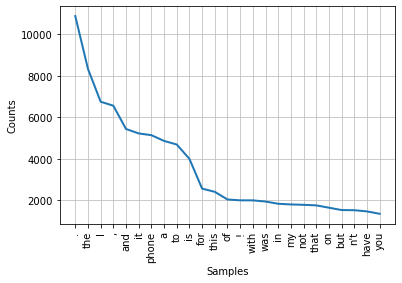

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
# Plot the distribution of words
from nltk import FreqDist

freqDist = FreqDist(flatten_reviews)
print(freqDist.most_common(10))
freqDist.plot(25, cumulative=False)

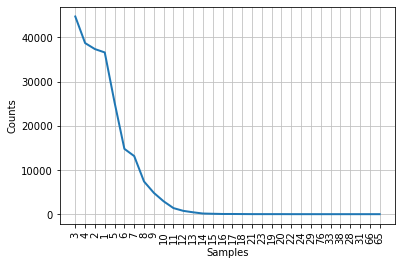

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
# Plot the distibution of word length size
len_words = [len(w) for w in flatten_reviews]
freqDist2 = FreqDist(len_words)
freqDist2.plot(cumulative=False)

In [9]:
# Put all reviews in lower case
lower_reviews = [r.lower() for r in TRAIN['Reviews']]
lower_reviews[:10]

['i love it!!! i absolutely love it!! 👌👍',
 'i love the blu phones! this is my second one this year and not because there is anything wrong with my blu studio 6.0 hd. i have just opted to "upgrade" to a phone with a slightly smaller screen and better battery life. for the price of these phones you cannot go wrong.1. setup is a breeze2. customization is easy3. colors are vibrant4. phone is light (even with a rugged case)5. battery life is better than any phone i have ever had6. screen is responsive to touch unlike some other phones.i have had no issue with volume or music playback as other reviewers have noted. all in all a great phone for a little price. everyone should give blu a try.',
 'great phone',
 'very happy with the performance. the apps worked flawlessly, camera could be better but no complaints considering it is only $50.',
 'easy to use great price',
 "came faster then expected, thanks cellathon. i've used androids and iphones, so this is the first time i used a windows pho

In [10]:
# Build a function named get_ngrams that return the list of n grams of a text.
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]

# Use this function to output print the ngrams of the following text
text = "I love the chocolate but I hate tea"

get_ngrams('This is the simplest text i could think of', 3 )

['This is the',
 'is the simplest',
 'the simplest text',
 'simplest text i',
 'text i could',
 'i could think',
 'could think of']

In [11]:
# For each reviews calculate its 3grams
ngrams_reviews = [get_ngrams(' '.join(r), 3) for r in reviews_tokenized]
ngrams_reviews[:2]

[['I love it',
  'love it !',
  'it ! !',
  '! ! !',
  '! ! I',
  '! I absolutely',
  'I absolutely love',
  'absolutely love it',
  'love it !',
  'it ! !',
  '! ! 👌👍'],
 ['I love the',
  'love the BLU',
  'the BLU phones',
  'BLU phones !',
  'phones ! This',
  '! This is',
  'This is my',
  'is my second',
  'my second one',
  'second one this',
  'one this year',
  'this year and',
  'year and not',
  'and not because',
  'not because there',
  'because there is',
  'there is anything',
  'is anything wrong',
  'anything wrong with',
  'wrong with my',
  'with my BLU',
  'my BLU Studio',
  'BLU Studio 6.0',
  'Studio 6.0 HD',
  '6.0 HD .',
  'HD . I',
  '. I have',
  'I have just',
  'have just opted',
  'just opted to',
  'opted to ``',
  'to `` upgrade',
  '`` upgrade ``',
  'upgrade `` to',
  '`` to a',
  'to a phone',
  'a phone with',
  'phone with a',
  'with a slightly',
  'a slightly smaller',
  'slightly smaller screen',
  'smaller screen and',
  'screen and better',
  'an

## Build X (features vectors) and y (labels)

In [12]:
# Construct X_train and y_train
X_train = TRAIN['Reviews'].fillna("")
y_train = TRAIN['Rating']
X_train.shape, y_train.shape

((5000,), (5000,))

In [13]:
# Construct X_val and y_val
X_val = VAL['Reviews'].fillna("")
y_val = VAL['Rating']
X_val.shape, y_val.shape

((1000,), (1000,))

In [14]:
# Construct X_test and y_test
X_test = TEST['Reviews'].fillna("")
y_test = TEST['Rating']
X_test.shape, y_test.shape

((1000,), (1000,))

## Build a Baseline
Using a binary `CountVectorizer` and a `LogisticRegression` classifier, learned in a previous lecture, build a first model.

For this model, you will not pre-process the text and will only use words (not N-grams). Leaves all parameter as default.

The evaluation metric is accuracy.

In [15]:
# Encode X_train
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(X_train)
X_train_encoded = cv.transform(X_train)
X_train_encoded.shape

(5000, 8991)

In [16]:
# What is the vocabulary size ?
# Compare with your previous response
len(cv.vocabulary_)

8991

In [17]:
# What is the stop words used
cv.stop_words_

set()

In [18]:
# Transform and then inverse transform the following text
# Interpret the result
text = "I love the chocolate but I hate tea"

cv.inverse_transform(cv.transform([text]))

[array(['but', 'hate', 'love', 'the'], dtype='<U30')]

In [19]:
# Using LogisticRegression from sklearn, fit a first model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_encoded, y_train)

LogisticRegression()

In [20]:
# Encode X_test
X_test_encoded = cv.transform(X_test)
X_test_encoded.shape

(1000, 8991)

In [21]:
# Using classification_report, evaluate the model
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test_encoded)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.64      0.64      0.64       159
           2       0.16      0.29      0.20        28
           3       0.15      0.21      0.18        52
           4       0.26      0.43      0.33        99
           5       0.90      0.76      0.82       662

    accuracy                           0.67      1000
   macro avg       0.42      0.47      0.44      1000
weighted avg       0.74      0.67      0.70      1000



## A better classifier with a preprocessing

It's up to you. Try to get a better score (accuracy) using what we have seen in this course:
- efficient text pre-processing
- choice of feature extraction
- use of a more powerful classifier or better hyper-parameter for LogisticRegression.

The training of the model must be done on the Train and the evaluation on the Test. You can of course use GridSearchCV or RandomizedSearchCV.

### Some pre-processing

In [22]:
# Write a "clean_text" function that accepts a text as input and returns a clean text.
# The possible steps (take what you want) are:
# - removal of emoji
# - lowercase the text
# - remove punctuation
# - remove words containing numbers
# - remove stop words
# - stemming or lemmatization
# - remove words smaller than n
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer

import string
import emoji

stemmer = PorterStemmer().stem

def clean_text(text):
    # remove emoji
    text = [c for w in text for c in w if c not in emoji.UNICODE_EMOJI]
    text = ''.join(text)
    
    # lower text
    text = text.lower()
    
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # lemmatization
    #text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # Stemming
    text = [stemmer(t) for t in text]
    
    # remove 2 chars word
    text = [t for t in text if len(t) > 2]
    
    return " ".join(text)

In [23]:
# Clean, X_train and X_test with the previous preprocessing
X_train_cleaned = [clean_text(r) for r in X_train]
X_test_cleaned = [clean_text(r) for r in X_test]

In [24]:
# Build, Fit and Evaluate a model using the previous preprocessing
# Did you improve the result ? 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

cv = CountVectorizer(analyzer='word', binary=True)
cv.fit(X_train_cleaned)
X_train_encoded = cv.transform(X_train_cleaned)

X_test_encoded = cv.transform(X_test_cleaned)

lr = LogisticRegression()
lr.fit(X_train_encoded, y_train)
y_pred = lr.predict(X_test_encoded)

accuracy_score(y_pred, y_test)

0.659

### Search hyper-parameters

![GridSearch](https://i.stack.imgur.com/81Yoo.png)


* The grid search provided by GridSearchCV exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter.
* RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:
    * A budget can be chosen independent of the number of parameters and possible values.
    * Adding parameters that do not influence the performance does not decrease efficiency.
* Scikit-learn also provides the HalvingGridSearchCV and HalvingRandomSearchCV estimators that can be used to search a parameter space using successive halving.
    * Successive halving (SH) is like a tournament among candidate parameter combinations. SH is an iterative selection process where all candidates (the parameter combinations) are evaluated with a small amount of resources at the first iteration. Only some of these candidates are selected for the next iteration, which will be allocated more resources. 

In [36]:
# Using Grid Search or Random Search try to find some better hyperparameters
from nltk import word_tokenize          
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, HalvingRandomSearchCV


# I use my own tokenizer
class MyTokenizer:
    def __call__(self, doc):
        return [clean_text(t) for t in word_tokenize(doc)]

# I define the pipeline
pipeline = Pipeline([
        ('feature_extraction',  TfidfVectorizer(tokenizer=MyTokenizer())),
        ('classification',  LogisticRegression(multi_class='auto', max_iter=400))
        ])

# I define the parameter space
parameters = {}
parameters['feature_extraction__max_df'] = [0.5, 0.6, 0.7, 0.8, 0.9]
parameters['feature_extraction__min_df'] = [1, 2, 3, 5, 10]
parameters['feature_extraction__binary'] = [True, False]
parameters['feature_extraction__ngram_range'] = [(1,1), (1,2), (1, 3), (1, 5)]

parameters['classification__C'] = [0.1, 1, 5, 10]

# I use GridSearchCV to search best hyper parameter
# I use RandomizedSearchCV to search good hyper parameter
grid = HalvingRandomSearchCV(pipeline, parameters, scoring='accuracy', cv=3, verbose=2)
grid.fit(X_train, y_train);

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 30
max_resources_: 5000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 166
n_resources: 30
Fitting 3 folds for each of 166 candidates, totalling 498 fits
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.7, feature_extraction__min_df=1, feature_extraction__ngram_range=(1, 5); total time=   0.6s
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.7, feature_extraction__min_df=1, feature_extraction__ngram_range=(1, 5); total time=   0.3s
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.7, feature_extraction__min_df=1, feature_extraction__ngram_range=(1, 5); total time=   0.3s
[CV] END classification__C=1, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 1); total time=   

[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.6, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 1); total time=   0.2s
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.6, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 1); total time=   0.2s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 2); total time=   0.3s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 2); total time=   0.2s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 2); total time=   0.3s
[CV] END classification__C=5, feature_extraction__binary=True, feat

[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 1); total time=   0.2s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 1); total time=   0.3s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.7, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 2); total time=   0.4s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.7, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 2); total time=   0.2s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.7, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 2); total time=   0.3s
[CV] END classification__C=10, feature_extraction__binary=True, feature

[CV] END classification__C=5, feature_extraction__binary=True, feature_extraction__max_df=0.5, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 5); total time=   0.2s
[CV] END classification__C=5, feature_extraction__binary=True, feature_extraction__max_df=0.5, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 5); total time=   0.3s
[CV] END classification__C=1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 1); total time=   0.3s
[CV] END classification__C=1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 1); total time=   0.2s
[CV] END classification__C=1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 1); total time=   0.2s
[CV] END classification__C=10, feature_extraction__binary=False, feature_extr

[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.7, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 5); total time=   0.2s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.7, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 5); total time=   0.3s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 3); total time=   0.4s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 3); total time=   0.2s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 3); total time=   0.3s
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_ex

[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.8, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 3); total time=   0.2s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.8, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 3); total time=   0.2s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 5); total time=   0.3s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 5); total time=   0.2s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 5); total time=   0.3s
[CV] END classification__C=10, feature_extraction__binary=True, featu

[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.8, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 2); total time=   0.2s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.8, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 2); total time=   0.2s
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.5, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 3); total time=   0.4s
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.5, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 3); total time=   0.2s
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.5, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 3); total time=   0.3s
[CV] END classification__C=5, feature_extraction__binary=True, featu

[CV] END classification__C=10, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 3); total time=   0.2s
[CV] END classification__C=10, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 3); total time=   0.2s
[CV] END classification__C=1, feature_extraction__binary=True, feature_extraction__max_df=0.6, feature_extraction__min_df=1, feature_extraction__ngram_range=(1, 1); total time=   0.3s
[CV] END classification__C=1, feature_extraction__binary=True, feature_extraction__max_df=0.6, feature_extraction__min_df=1, feature_extraction__ngram_range=(1, 1); total time=   0.2s
[CV] END classification__C=1, feature_extraction__binary=True, feature_extraction__max_df=0.6, feature_extraction__min_df=1, feature_extraction__ngram_range=(1, 1); total time=   0.3s
[CV] END classification__C=1, feature_extraction__binary=False, feature_extr

[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.8, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 5); total time=   0.2s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.8, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 5); total time=   0.3s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 3); total time=   0.3s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 3); total time=   0.2s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 3); total time=   0.2s
[CV] END classification__C=5, feature_extraction__binary=False, feature_ext

[CV] END classification__C=1, feature_extraction__binary=True, feature_extraction__max_df=0.7, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 2); total time=   0.3s
[CV] END classification__C=1, feature_extraction__binary=True, feature_extraction__max_df=0.8, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   0.2s
[CV] END classification__C=1, feature_extraction__binary=True, feature_extraction__max_df=0.8, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   0.1s
[CV] END classification__C=1, feature_extraction__binary=True, feature_extraction__max_df=0.8, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   0.2s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=1, feature_extraction__ngram_range=(1, 1); total time=   0.3s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature

[CV] END classification__C=5, feature_extraction__binary=True, feature_extraction__max_df=0.6, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   0.2s
[CV] END classification__C=1, feature_extraction__binary=True, feature_extraction__max_df=0.6, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 3); total time=   0.3s
[CV] END classification__C=1, feature_extraction__binary=True, feature_extraction__max_df=0.6, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 3); total time=   0.1s
[CV] END classification__C=1, feature_extraction__binary=True, feature_extraction__max_df=0.6, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 3); total time=   0.5s
[CV] END classification__C=1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 3); total time=   0.2s
[CV] END classification__C=1, feature_extraction__binary=False, feature_extra

[CV] END classification__C=10, feature_extraction__binary=True, feature_extraction__max_df=0.7, feature_extraction__min_df=1, feature_extraction__ngram_range=(1, 3); total time=   0.3s
[CV] END classification__C=5, feature_extraction__binary=True, feature_extraction__max_df=0.7, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   0.2s
[CV] END classification__C=5, feature_extraction__binary=True, feature_extraction__max_df=0.7, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   0.1s
[CV] END classification__C=5, feature_extraction__binary=True, feature_extraction__max_df=0.7, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   0.2s
----------
iter: 1
n_candidates: 56
n_resources: 90
Fitting 3 folds for each of 56 candidates, totalling 168 fits
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=3, feature_extraction

[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.7, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 1); total time=   0.6s
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.7, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 1); total time=   1.6s
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.9, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 5); total time=   1.1s
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.9, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 5); total time=   0.6s
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.9, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 5); total time=   0.8s
[CV] END classification__C=0.1, feature_extraction__binary=False, feat

[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.8, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 2); total time=   0.9s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.8, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 2); total time=   0.9s
[CV] END classification__C=1, feature_extraction__binary=False, feature_extraction__max_df=0.9, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 3); total time=   0.7s
[CV] END classification__C=1, feature_extraction__binary=False, feature_extraction__max_df=0.9, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 3); total time=   0.5s
[CV] END classification__C=1, feature_extraction__binary=False, feature_extraction__max_df=0.9, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 3); total time=   0.7s
[CV] END classification__C=0.1, feature_extraction__binary=False, featu

[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.7, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   0.9s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.7, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   0.6s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.7, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   0.9s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   0.8s
[CV] END classification__C=5, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   0.6s
[CV] END classification__C=5, feature_extraction__binary=False, featur

[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.7, feature_extraction__min_df=5, feature_extraction__ngram_range=(1, 1); total time=   2.1s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 2); total time=   2.0s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 2); total time=   2.0s
[CV] END classification__C=0.1, feature_extraction__binary=False, feature_extraction__max_df=0.5, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 2); total time=   2.1s
[CV] END classification__C=0.1, feature_extraction__binary=True, feature_extraction__max_df=0.7, feature_extraction__min_df=3, feature_extraction__ngram_range=(1, 1); total time=   2.3s
[CV] END classification__C=0.1, feature_extraction__binary=True, fe

[CV] END classification__C=1, feature_extraction__binary=True, feature_extraction__max_df=0.8, feature_extraction__min_df=10, feature_extraction__ngram_range=(1, 1); total time=   1.9s
[CV] END classification__C=10, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 1); total time=   1.9s
[CV] END classification__C=10, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 1); total time=   2.4s
[CV] END classification__C=10, feature_extraction__binary=False, feature_extraction__max_df=0.6, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 1); total time=   2.2s
[CV] END classification__C=10, feature_extraction__binary=False, feature_extraction__max_df=0.8, feature_extraction__min_df=2, feature_extraction__ngram_range=(1, 1); total time=   2.2s
[CV] END classification__C=10, feature_extraction__binary=False, featur

In [38]:
def plot_results(rsh):
    results = pd.DataFrame(rsh.cv_results_)
    results["params_str"] = results.params.apply(str)
    results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
    mean_scores = results.pivot(
        index="iter", columns="params_str", values="mean_test_score"
    )
    ax = mean_scores.plot(legend=False, alpha=0.6)

    labels = [
        f"iter={i}\nn_samples={rsh.n_resources_[i]}\nn_candidates={rsh.n_candidates_[i]}"
        for i in range(rsh.n_iterations_)
    ]

    ax.set_xticks(range(rsh.n_iterations_))
    ax.set_xticklabels(labels, rotation=45, multialignment="left")
    ax.set_title("Scores of candidates over iterations")
    ax.set_ylabel("mean test score", fontsize=15)
    ax.set_xlabel("iterations", fontsize=15)
    plt.tight_layout()
    plt.show()

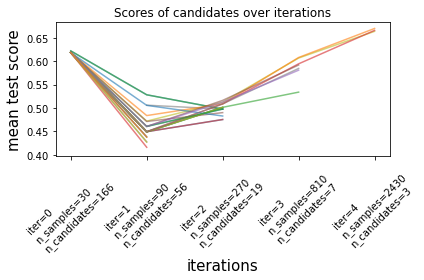

In [39]:
plot_results(grid)

## Summarize your conclusion here

In [40]:
# What is your best params
grid.best_params_

{'feature_extraction__ngram_range': (1, 1),
 'feature_extraction__min_df': 3,
 'feature_extraction__max_df': 0.9,
 'feature_extraction__binary': True,
 'classification__C': 1}

In [41]:
# What is your best score
grid.best_score_

0.6702345526408156

In [42]:
# What is your best estimator
grid.best_estimator_

Pipeline(steps=[('feature_extraction',
                 TfidfVectorizer(binary=True, max_df=0.9, min_df=3,
                                 tokenizer=<__main__.MyTokenizer object at 0x7f8fd38b7ac0>)),
                ('classification', LogisticRegression(C=1, max_iter=400))])

A random draw with balanced classes (as much data from each class) would give an accuracy of 20% (1/5). We notice that a very light pre-processing or even no pre-processing already gives much better results (around 65-66%) and that it is not easy to do much better.

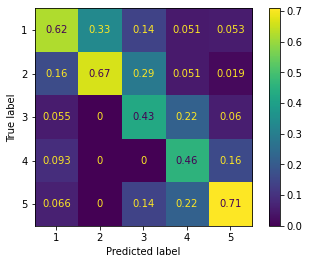

In [43]:
# Print/plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid, X_test, y_test, normalize="pred");

The confusion matrix helps us understand the quality of the results. On the diagonal we find the quality of the predictions for a given class:
* Class 1, 2 and 5 are correctly classified more than 60 %.
* Class 3, 4 and bellow 50 %

In one column, there is the way the prediction of a class breaks down with respect to the original classes i.e. for the second columns:
* 67% of the data predicted as a class 2, are from this class
* and 33% of the data predicted as a class 2, come from class 1
The sum is 100%.

If we are looking for the way the original class is decomposed, we must normalize on the rows and not on the columns

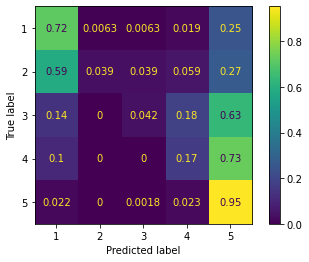

In [44]:
plot_confusion_matrix(grid, X_test, y_test, normalize="true");

Class 2 is predicted to:
* 60% as a class 1
* 30% as a class 5
* only 4% like class 2
* and 4%, 6% as a class 3 and 4 respectively.

It's also possible to plot, the confusion matrix with data.

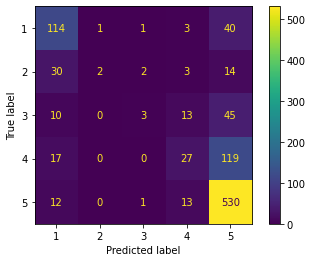

In [45]:
plot_confusion_matrix(grid, X_test, y_test, normalize=None);